

# Project: Investigation on Brazallian Appointments Dataset (Finding the reasons for non showing of the patients)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

**Questions Asked in This Analysis:**
- Does Age Affect the no-show percentage?
- Does Gender affect the appointments?
- Does Diseases affect the appointments?
- Does SMS affect the appointments?
- Does Neighbourhood affect the appointments?
- Does Difference between schedule day and appointments day have an effect ?

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [37]:
#load data
df = pd.read_csv('no-show-original.csv').copy()
#View dataset
df


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [38]:
#General information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [39]:
#creating new list for the columns names that will be changed
new_names=['patient_id','appointment_id','gender','scheduled_date','appointment_date','age','neighbourhood','scholarship','hipertension','diabetes','alcoholism','handcap','sms_received','no_show']
#Apply the new column names
df.columns=new_names
#view dataframe after renaming the columns
df

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [40]:
#Changing the scheduled_date and appointment_date to appropriate date and time format to extract time and days from it
df['scheduled_date'] = pd.to_datetime(df['scheduled_date'])
df['appointment_date'] = pd.to_datetime(df['appointment_date'])
# Extracting appointment day from the apoointment date
df['appointment_day']=df['appointment_date'].dt.strftime('%A')

# Finding the days differnece between scheduled day and appointment day
df['days_difference']=df['appointment_date'].dt.date - df['scheduled_date'].dt.date
# Changing the date to days format
df['days_difference']=df['days_difference'].dt.days

# Creating new order for the dataframe to make sure that relevant data re next to each other
order=['patient_id','appointment_id','gender','scheduled_date','appointment_date','appointment_day','days_difference','age','neighbourhood','scholarship','hipertension','diabetes','alcoholism','handcap','sms_received','no_show']
# Applying the new ordering
df=df[order]

df

,patient_id,appointment_id,gender,scheduled_date,appointment_date,appointment_day,days_difference,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Friday,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Friday,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,Friday,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,Friday,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,Friday,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,Tuesday,35,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,Tuesday,35,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,Tuesday,41,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,Tuesday,41,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Data Cleaning ()

In [41]:
#  Summery describtion for the data 
df.describe()


,patient_id,appointment_id,days_difference,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,10.183702,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,15.254996,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**What is needed to be cleaned**
- There is wrong value of -1 in age column
- the handcap has wrong value of 4 in multiplie columns which need to be changed to 0 or 1
- days_differnce has negative values which is not correct
- no_show column has values of 1 not no or yes which need to be changed


In [42]:
# Checking for null rows
df.isnull().sum()

patient_id          0
appointment_id      0
gender              0
scheduled_date      0
appointment_date    0
appointment_day     0
days_difference     0
age                 0
neighbourhood       0
scholarship         0
hipertension        0
diabetes            0
alcoholism          0
handcap             0
sms_received        0
no_show             0
dtype: int64

In [43]:
# Finding Duplicated rows
df.duplicated().sum()

0

In [44]:
# Checking for duplicated appointments ID
df['appointment_id'].duplicated().sum()

0

In [45]:
#Checking for duplicated patients with same appointment date
duplicated_patients = df[['patient_id','appointment_date']].duplicated()
# Dropping the duplicated patients
df=df[~(duplicated_patients)]
df


,patient_id,appointment_id,gender,scheduled_date,appointment_date,appointment_day,days_difference,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Friday,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Friday,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,Friday,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,Friday,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,Friday,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,Tuesday,35,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,Tuesday,35,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,Tuesday,41,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,Tuesday,41,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [46]:
# Getting the rows which ages is negative value
passed_date=df.query('days_difference < 0').index
# Dropping these rows
df= df.drop(passed_date)


In [47]:
# Dropping rows which has negative value age
df=df.drop(df.query('age < 0').index)


In [48]:
# Changing handcap value which is not 1 or 2 to 1 
df.loc[df['handcap'] > 1] = 1
df

,patient_id,appointment_id,gender,scheduled_date,appointment_date,appointment_day,days_difference,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,Friday,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,Friday,0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,Friday,0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,Friday,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,Friday,0,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,Tuesday,35,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,Tuesday,35,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,Tuesday,41,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,Tuesday,41,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [49]:
# Describtion of data after cleaning
df.describe()

,patient_id,appointment_id,days_difference,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.018030e+05,1.018030e+05,101803.000000,101803.000000,101803.000000,101803.000000,101803.000000,101803.000000,101803.000000,101803.000000
mean,1.462776e+14,5.664867e+06,10.272762,36.980816,0.099241,0.199356,0.073966,0.029341,0.019773,0.336798
std,2.547061e+14,2.482472e+05,15.300436,23.232044,0.298986,0.399518,0.261717,0.168761,0.139222,0.472617
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.111959e+12,5.639644e+06,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.135918e+13,5.680044e+06,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.419408e+13,5.725038e+06,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Changing no_show rows which has value of 1 to Yes
no_show_wrong = df.query('no_show == 1')

no_show_wrong['no_show'].replace({1:"Yes"})



946       Yes
1665      Yes
2091      Yes
2213      Yes
2214      Yes
         ... 
108376    Yes
109484    Yes
109733    Yes
109975    Yes
110107    Yes
Name: no_show, Length: 179, dtype: object

In [51]:
# Total number of cases
total = df.shape[0]
# Number of abscent cases
number_no_show = len(df.query('no_show == "Yes"'))

# Ratio Between total number of cases and number of abscecnt cases
ratio = number_no_show/total
print('Total Number of Cases = {} \n Number of No show Cases ={} \n Ratio = {}\n'.format(total,number_no_show,ratio))

Total Number of Cases = 101803 
 Number of No show Cases =20383 
 Ratio = 0.2002200328084634



<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Does Age Affect the no-show percentage)
> This question is important as the age has a huge factor on whether the patient will attend or become abscent. by performing abscent to attend ratio comparing to the age, we can see if the age really affect the attend or no show of the patient
    

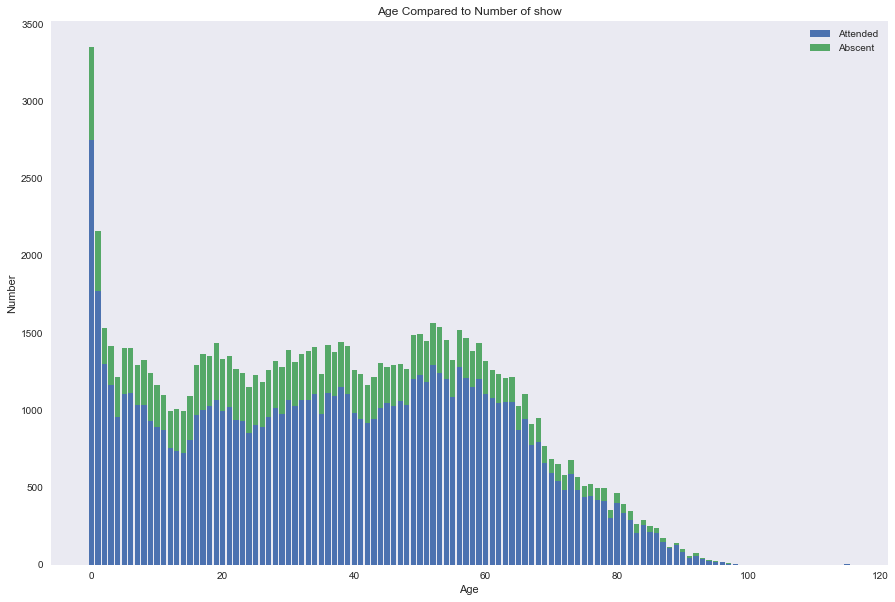

In [52]:
no_show = df[df['no_show'] == 'Yes']

df_age_no_show = df[df['no_show'] == 'Yes'][['age','patient_id']].groupby('age').count()
df_age_show = df[df['no_show'] == 'No'][['age','patient_id']].groupby('age').count()

df_age_merge = pd.merge(df_age_show,df_age_no_show,how='right',on='age',suffixes=['_attend','_abscent'])

figure,ax = plt.subplots()
ax.bar(df_age_merge.index,df_age_merge['patient_id_attend'],label='Attended')
ax.bar(df_age_merge.index,df_age_merge['patient_id_abscent'],label='Abscent',bottom=df_age_merge['patient_id_attend'])
ax.set_title("Age Compared to Number of show")
ax.set_ylabel('Number')
ax.set_xlabel('Age')
ax.legend()
ax.grid()
figure.set_figheight(10)
figure.set_figwidth(15)




**As we can see, the patient with age 0 which may be a newborn babies has a high attend rate which is naturally as the new born need a greater attention than the adult one**

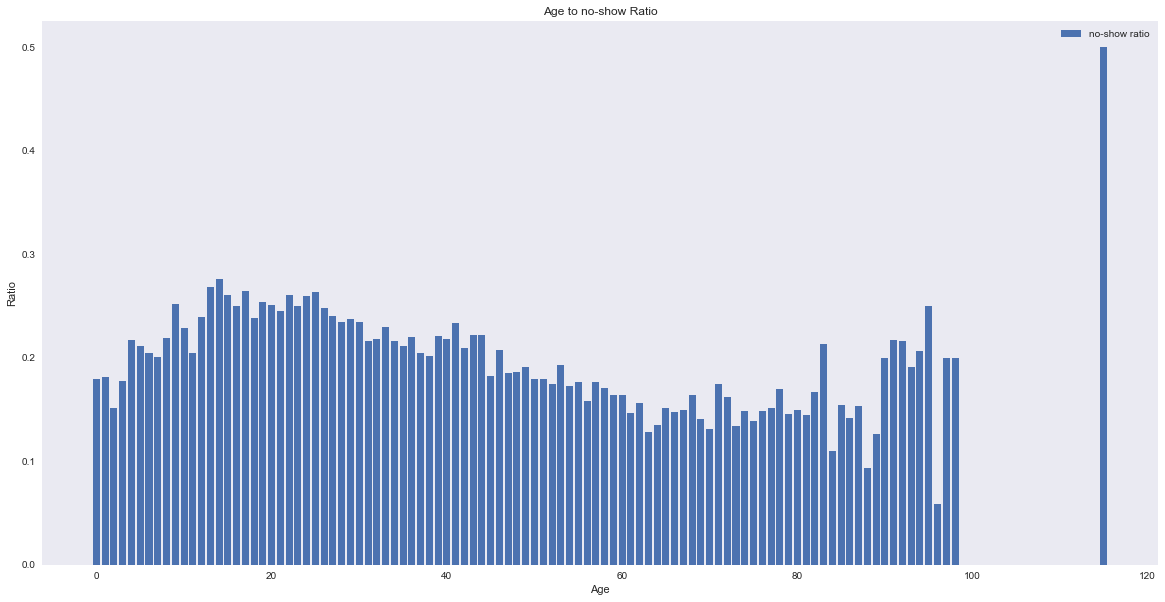

In [53]:
df_age_merge['ratio']=df_age_merge['patient_id_abscent']/(df_age_merge['patient_id_attend']+df_age_merge['patient_id_abscent'])

figure,ax = plt.subplots()
ax.bar(df_age_merge.index,df_age_merge['ratio'],label='no-show ratio')
ax.set_title("Age to no-show Ratio")
ax.set_ylabel('Ratio')
ax.set_xlabel('Age')
ax.legend()
ax.grid()
figure.set_figheight(10)
figure.set_figwidth(20)

- There is outlier here of age 115
- There is no significence difference between age ratios. thus, age has no effect on abscence 


### Research Question 2  (Does Gender affect the appointments?)
> This question shows if the gender has really effect on attending the appointment or not. it is useful sometimes as may there is a problem that prevent a specific gender from attending the appointment

<AxesSubplot:title={'center':'Comparing Genders to attend or no show'}, xlabel='gender', ylabel='Number of Cases'>

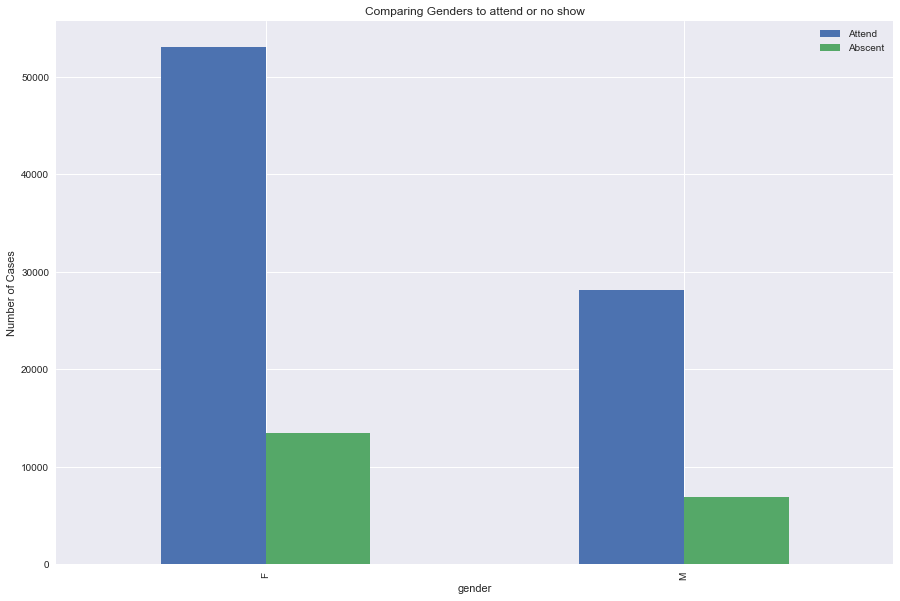

In [72]:
df_gender_show = df.query('no_show == "No"')[['gender','patient_id']].groupby('gender').count()

df_gender_no_show = df[df['no_show'] == 'Yes'][['gender','patient_id']].groupby('gender').count()

df_gender_merge = pd.merge(df_gender_show,df_gender_no_show,how='left',on='gender',suffixes=['_attend','_abscent'])
df_gender_merge.columns=['Attend','Abscent']
df_gender_merge


df_gender_merge.plot.bar(title='Comparing Genders to attend or no show',ylabel='Number of Cases',figsize=[15,10])



- wow, the females has much higher attending number than males. when linking the number of females with number of new born babies, we can see that there is a high pregnency rate and females maybe has higher sick rate

Male Ratio: 0.19809708295350958 
Female Ratio:0.20187913409500902


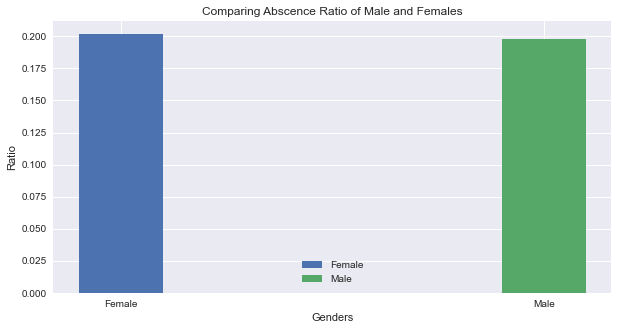

In [74]:
male_ratio= df_gender_merge['Abscent']['M']/(df_gender_merge['Abscent']['M']+df_gender_merge['Attend']['M'])
female_ratio =  df_gender_merge['Abscent']['F']/(df_gender_merge['Abscent']['F']+df_gender_merge['Attend']['F'])

x=[0,1]
plt.rcParams["figure.figsize"] = (10,5)
plt.bar(0,female_ratio,width=0.2,label='Female')
plt.bar(1,male_ratio,width=0.2,label='Male')
plt.legend()
plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.title('Comparing Abscence Ratio of Male and Females')
plt.ylabel('Ratio')
plt.xlabel('Genders')

print('Male Ratio: {} \nFemale Ratio:{}'.format(male_ratio,female_ratio))

- The difference between two ratios are small. thus, the gender has no effect on whether the patient will attend or not

### Research Question 3  (Does Diseases affect the appointments?)
> Maybe a certain disease cause an increased attendence of the appointments. we will discuss and graph each disease individualy(hipertension, diabetes, alcholism and handcap)

Text(0.5, 1.0, 'Comparing Hipertenson to no show number')

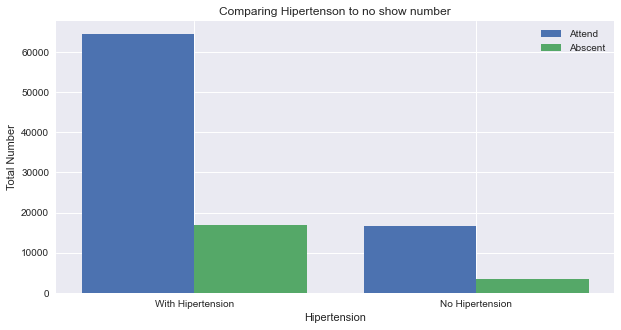

In [75]:
df_hiper_show = df.query('no_show == "No"')[['hipertension','patient_id']].groupby('hipertension').count()

df_hiper_no_show = df.query('no_show == "Yes"')[['hipertension','patient_id']].groupby('hipertension').count()

df_hiper_merge = pd.merge(df_hiper_show,df_hiper_no_show,how='right',on='hipertension',suffixes=['_Attend','_Abscent'])

df_hiper_merge.columns =['Attend','Abscent']
df_hiper_merge

bar = np.arange(len(df_hiper_merge))
width=0.4

plt.bar(x=bar,height=df_hiper_merge['Attend'],width=width,label='Attend')
plt.bar(x=bar+0.4,height=df_hiper_merge['Abscent'],width=width,label='Abscent')
plt.xticks(bar+0.2,labels=['With Hipertension','No Hipertension'])
plt.legend()
plt.ylabel('Total Number')
plt.xlabel('Hipertension')
plt.title('Comparing Hipertenson to no show number')



- higher attend cases is accompined by existing of hipertension

With Hipertension Ratio: 0.1705607476635514 
Without Hipertension Ratio:0.20797958482602935


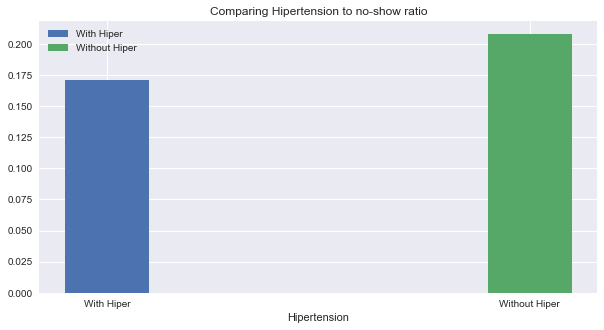

In [76]:
with_hiper_ratio= df_hiper_merge['Abscent'][1]/(df_hiper_merge['Abscent'][1]+df_hiper_merge['Attend'][1])
without_hiper_ratio =  df_hiper_merge['Abscent'][0]/(df_hiper_merge['Abscent'][0]+df_hiper_merge['Attend'][0])

x=[0,1]
plt.bar(0,with_hiper_ratio,width=0.2,label='With Hiper')
plt.bar(1,without_hiper_ratio,width=0.2,label='Without Hiper')
plt.legend()
plt.xticks(ticks=[0,1],labels=['With Hiper','Without Hiper'])
plt.xlabel('Hipertension')
plt.title('Comparing Hipertension to no-show ratio')


print('With Hipertension Ratio: {} \nWithout Hipertension Ratio:{}'.format(with_hiper_ratio,without_hiper_ratio))

- There is a very small difference between the hipertension no-show ratios, concluding that hieprtension has no effect on attending the appointments or not 

Text(0.5, 1.0, 'Comparing Diabetes to no-show ratio')

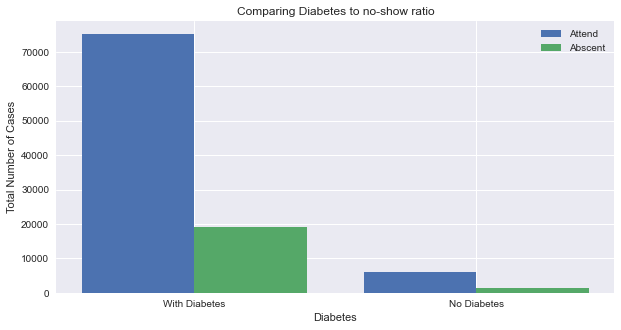

In [77]:
df_diabetes_show = df.query('no_show == "No"')[['diabetes','patient_id']].groupby('diabetes').count()

df_diabetes_no_show = df.query('no_show == "Yes"')[['diabetes','patient_id']].groupby('diabetes').count()

df_diabetes_merge = pd.merge(df_diabetes_show,df_diabetes_no_show,how='left',on='diabetes',suffixes=['_Attend','_Abscent'])

df_diabetes_merge.columns =['Attend','Abscent']
df_diabetes_merge

bar = np.arange(len(df_diabetes_merge))
width=0.4

plt.bar(x=bar,height=df_diabetes_merge['Attend'],width=width,label='Attend')
plt.bar(x=bar+0.4,height=df_diabetes_merge['Abscent'],width=width,label='Abscent')
plt.xticks(bar+0.2,labels=['With Diabetes','No Diabetes'])
plt.legend()
plt.ylabel('Total Number of Cases')
plt.xlabel('Diabetes')
plt.title('Comparing Diabetes to attendence and abscence')

- people with diabetes has high higher attend rate than people with no diabetes

With Diabetes Ratio: 0.17739083117943136 
Without Diabetes Ratio:0.20238032098267797


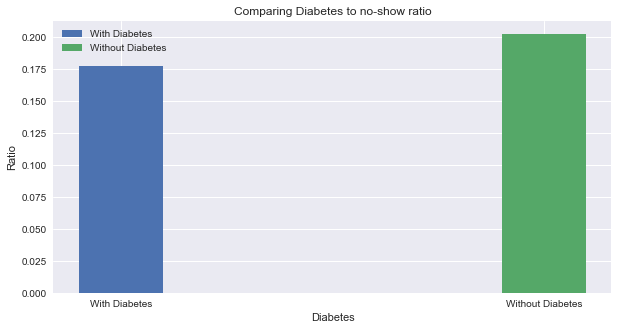

In [82]:
with_diabetes_ratio= df_diabetes_merge['Abscent'][1]/(df_diabetes_merge['Abscent'][1]+df_diabetes_merge['Attend'][1])
without_diabetes_ratio =  df_diabetes_merge['Abscent'][0]/(df_diabetes_merge['Abscent'][0]+df_diabetes_merge['Attend'][0])

x=[0,1]
plt.bar(0,with_diabetes_ratio,width=0.2,label='With Diabetes')
plt.bar(1,without_diabetes_ratio,width=0.2,label='Without Diabetes')
plt.legend()
plt.xticks(ticks=[0,1],labels=['With Diabetes','Without Diabetes'])
plt.xlabel('Diabetes')
plt.ylabel('Ratio')
plt.title('Comparing Diabetes to no-show ratio')


print('With Diabetes Ratio: {} \nWithout Diabetes Ratio:{}'.format(with_diabetes_ratio,without_diabetes_ratio))

- the difference of ratios isn't big which indicate that diabetes has no effect on abscence

Text(0, 0.5, 'Total Number')

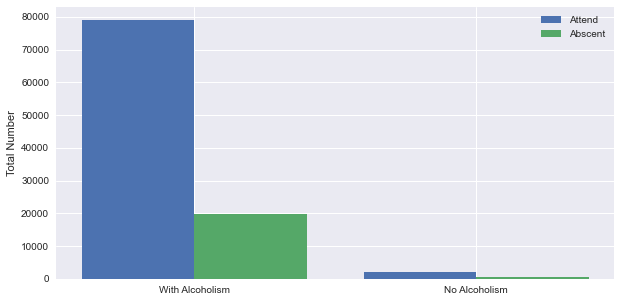

In [60]:
df_alcoholism_show = df.query('no_show == "No"')[['alcoholism','patient_id']].groupby('alcoholism').count()

df_alcoholism_no_show = df.query('no_show == "Yes"')[['alcoholism','patient_id']].groupby('alcoholism').count()

df_alcoholism_merge = pd.merge(df_alcoholism_show,df_alcoholism_no_show,how='left',on='alcoholism',suffixes=['_Attend','_Abscent'])

df_alcoholism_merge.columns =['Attend','Abscent']
df_alcoholism_merge

bar = np.arange(len(df_alcoholism_merge))
width=0.4

plt.bar(x=bar,height=df_alcoholism_merge['Attend'],width=width,label='Attend')
plt.bar(x=bar+0.4,height=df_alcoholism_merge['Abscent'],width=width,label='Abscent')
plt.xticks(bar+0.2,labels=['With Alcoholism','No Alcoholism'])
plt.legend()
plt.xlabel('Alcholism')
plt.title('Comparing existance of Alcholism to no-show ')
plt.ylabel('Total Number of Cases')

With Alcoholism Ratio: 0.21474358974358973 
Without Alcoholism Ratio:0.20017001295336787


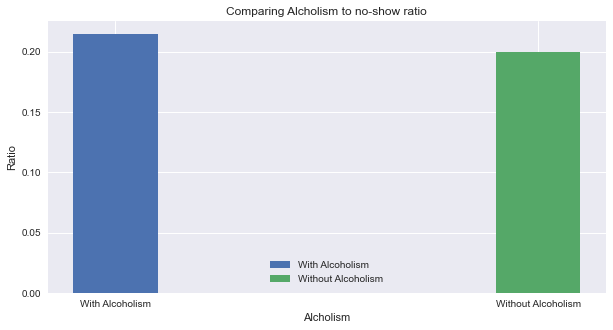

In [81]:
with_alcoholism_ratio= df_alcoholism_merge['Abscent'][1]/(df_alcoholism_merge['Abscent'][1]+df_alcoholism_merge['Attend'][1])
without_alcoholism_ratio =  df_alcoholism_merge['Abscent'][0]/(df_alcoholism_merge['Abscent'][0]+df_alcoholism_merge['Attend'][0])

x=[0,1]
plt.bar(0,with_alcoholism_ratio,width=0.2,label='With Alcoholism')
plt.bar(1,without_alcoholism_ratio,width=0.2,label='Without Alcoholism')
plt.legend()
plt.xticks(ticks=[0,1],labels=['With Alcoholism','Without Alcoholism'])
plt.xlabel('Alcholism')
plt.ylabel('Ratio')
plt.title('Comparing Alcholism to no-show ratio')



print('With Alcoholism Ratio: {} \nWithout Alcoholism Ratio:{}'.format(with_alcoholism_ratio,without_alcoholism_ratio))

- as the chart prevail, the alcholism has no effect on attending the appointments

Text(0, 0.5, 'Total Number')

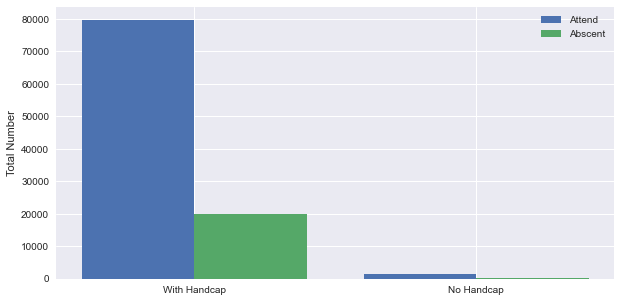

In [62]:
df_handcap_show = df.query('no_show == "No"')[['handcap','patient_id']].groupby('handcap').count()

df_handcap_no_show = df.query('no_show == "Yes"')[['handcap','patient_id']].groupby('handcap').count()

df_handcap_merge = pd.merge(df_handcap_show,df_handcap_no_show,how='left',on='handcap',suffixes=['_Attend','_Abscent'])

df_handcap_merge.columns =['Attend','Abscent']
df_handcap_merge

bar = np.arange(len(df_handcap_merge))
width=0.4

plt.bar(x=bar,height=df_handcap_merge['Attend'],width=width,label='Attend')
plt.bar(x=bar+0.4,height=df_handcap_merge['Abscent'],width=width,label='Abscent')
plt.xticks(bar+0.2,labels=['With Handcap','No Handcap'])
plt.legend()
plt.ylabel('Total Number of Cases')
plt.xlabel('Handcap')
plt.title('Comparing Handcap with no-show')

With Handcap Ratio: 0.16848418756815703 
Without Handcap Ratio:0.20116244112636536


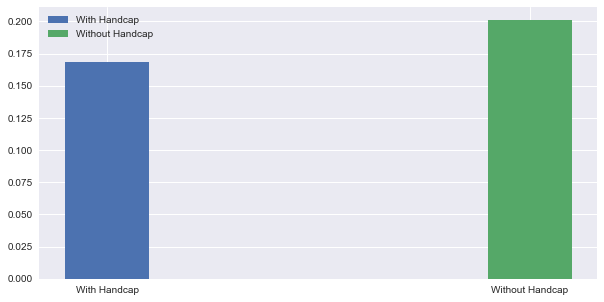

In [63]:
with_handcap_ratio= df_handcap_merge['Abscent'][1]/(df_handcap_merge['Abscent'][1]+df_handcap_merge['Attend'][1])
without_handcap_ratio =  df_handcap_merge['Abscent'][0]/(df_handcap_merge['Abscent'][0]+df_handcap_merge['Attend'][0])

x=[0,1]
plt.bar(0,with_handcap_ratio,width=0.2,label='With Handcap')
plt.bar(1,without_handcap_ratio,width=0.2,label='Without Handcap')
plt.legend()
plt.xticks(ticks=[0,1],labels=['With Handcap','Without Handcap'])
plt.xlabel('Handcap')
plt.ylabel('Ratio')
plt.title('Comparing Handcap to no-show ratio')


print('With Handcap Ratio: {} \nWithout Handcap Ratio:{}'.format(with_handcap_ratio,without_handcap_ratio))

- The ratio is small enough that means that handcap has no effect on abscence

### Research Question 4  (Does Scholarship affect the appointments?)
> maybe the people with scholarship or medical insurance has highe attendence rate as they don't pay as much as people with no insurance 

Text(0, 0.5, 'Total Number')

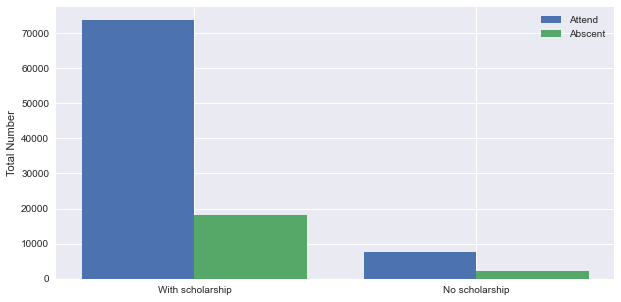

In [64]:
df_scholarship_show = df.query('no_show == "No"')[['scholarship','patient_id']].groupby('scholarship').count()

df_scholarship_no_show = df.query('no_show == "Yes"')[['scholarship','patient_id']].groupby('scholarship').count()

df_scholarship_merge = pd.merge(df_scholarship_show,df_scholarship_no_show,how='left',on='scholarship',suffixes=['_Attend','_Abscent'])

df_scholarship_merge.columns =['Attend','Abscent']
df_scholarship_merge

bar = np.arange(len(df_scholarship_merge))
width=0.4

plt.bar(x=bar,height=df_scholarship_merge['Attend'],width=width,label='Attend')
plt.bar(x=bar+0.4,height=df_scholarship_merge['Abscent'],width=width,label='Abscent')
plt.xticks(bar+0.2,labels=['With scholarship','No scholarship'])
plt.legend()
plt.ylabel('Total Number of Cases')
plt.xlabel('Schoalrship')
plt.title('Comparing Schoalrship to no-show ')

With scholarship Ratio: 0.23599355098750505 
Without scholarship Ratio:0.19673936750272628


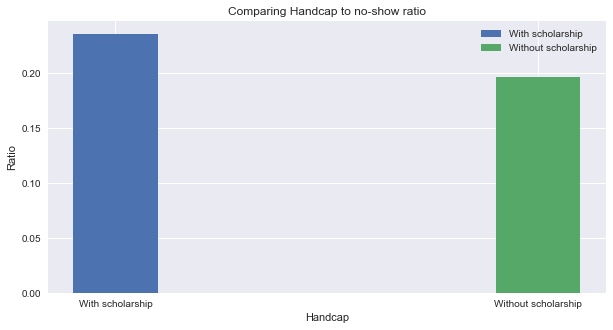

In [83]:
with_scholarship_ratio= df_scholarship_merge['Abscent'][1]/(df_scholarship_merge['Abscent'][1]+df_scholarship_merge['Attend'][1])
without_scholarship_ratio =  df_scholarship_merge['Abscent'][0]/(df_scholarship_merge['Abscent'][0]+df_scholarship_merge['Attend'][0])

x=[0,1]
plt.bar(0,with_scholarship_ratio,width=0.2,label='With scholarship')
plt.bar(1,without_scholarship_ratio,width=0.2,label='Without scholarship')
plt.legend()
plt.xticks(ticks=[0,1],labels=['With scholarship','Without scholarship'])
plt.xlabel('Handcap')
plt.ylabel('Ratio')
plt.title('Comparing Handcap to no-show ratio')


print('With scholarship Ratio: {} \nWithout scholarship Ratio:{}'.format(with_scholarship_ratio,without_scholarship_ratio))

- as it clear tho. scholarship is not the main problem for abscence of the patients

### Research Question 5  (Does SMS affect the appointments?)
> maybe people forget that they have an appointments later on and the message has in impact on attendence

Text(0, 0.5, 'Total Number')

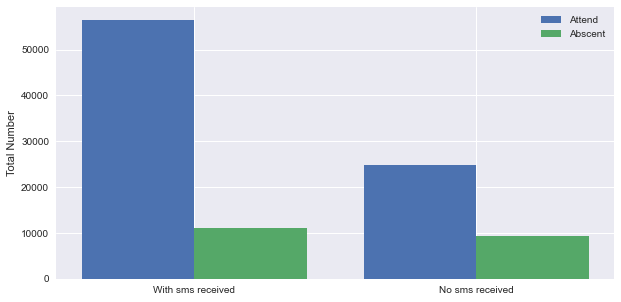

In [66]:
df_sms_received_show = df.query('no_show == "No"')[['sms_received','patient_id']].groupby('sms_received').count()

df_sms_received_no_show = df.query('no_show == "Yes"')[['sms_received','patient_id']].groupby('sms_received').count()

df_sms_received_merge = pd.merge(df_sms_received_show,df_sms_received_no_show,how='left',on='sms_received',suffixes=['_Attend','_Abscent'])

df_sms_received_merge.columns =['Attend','Abscent']
df_sms_received_merge

bar = np.arange(len(df_sms_received_merge))
width=0.4

plt.bar(x=bar,height=df_sms_received_merge['Attend'],width=width,label='Attend')
plt.bar(x=bar+0.4,height=df_sms_received_merge['Abscent'],width=width,label='Abscent')
plt.xticks(bar+0.2,labels=['With sms received','No sms received'])
plt.legend()
plt.ylabel('Total Number of Cases')
plt.xlabel('Diabetes')
plt.title('Comparing SMS Recived to number of attendece')

With sms received Ratio: 0.2738653688284273 
Without sms received Ratio:0.1635464186266959


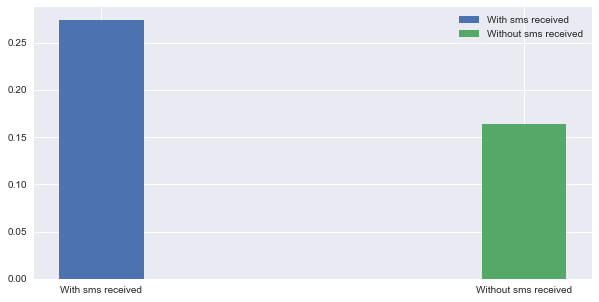

In [67]:
with_sms_received_ratio= df_sms_received_merge['Abscent'][1]/(df_sms_received_merge['Abscent'][1]+df_sms_received_merge['Attend'][1])
without_sms_received_ratio =  df_sms_received_merge['Abscent'][0]/(df_sms_received_merge['Abscent'][0]+df_sms_received_merge['Attend'][0])

x=[0,1]
plt.bar(0,with_sms_received_ratio,width=0.2,label='With sms received')
plt.bar(1,without_sms_received_ratio,width=0.2,label='Without sms received')
plt.legend()
plt.xticks(ticks=[0,1],labels=['With sms received','Without sms received'])
plt.xlabel('SMS Received')
plt.ylabel('Ratio')
plt.title('Comparing SMS Received to no-show ratio')


print('With sms received Ratio: {} \nWithout sms received Ratio:{}'.format(with_sms_received_ratio,without_sms_received_ratio))

- wow, peope who received sms has higher abscence rate than peopl who didn't receive a sms

### Research Question 6  (Does Neighbourhood affect the appointments?)
> maybe Neighbourhood has a problem or the hospital itself got something wrong that affect the attendence of the appointments

<AxesSubplot:xlabel='Neighbourhoods', ylabel='Number'>

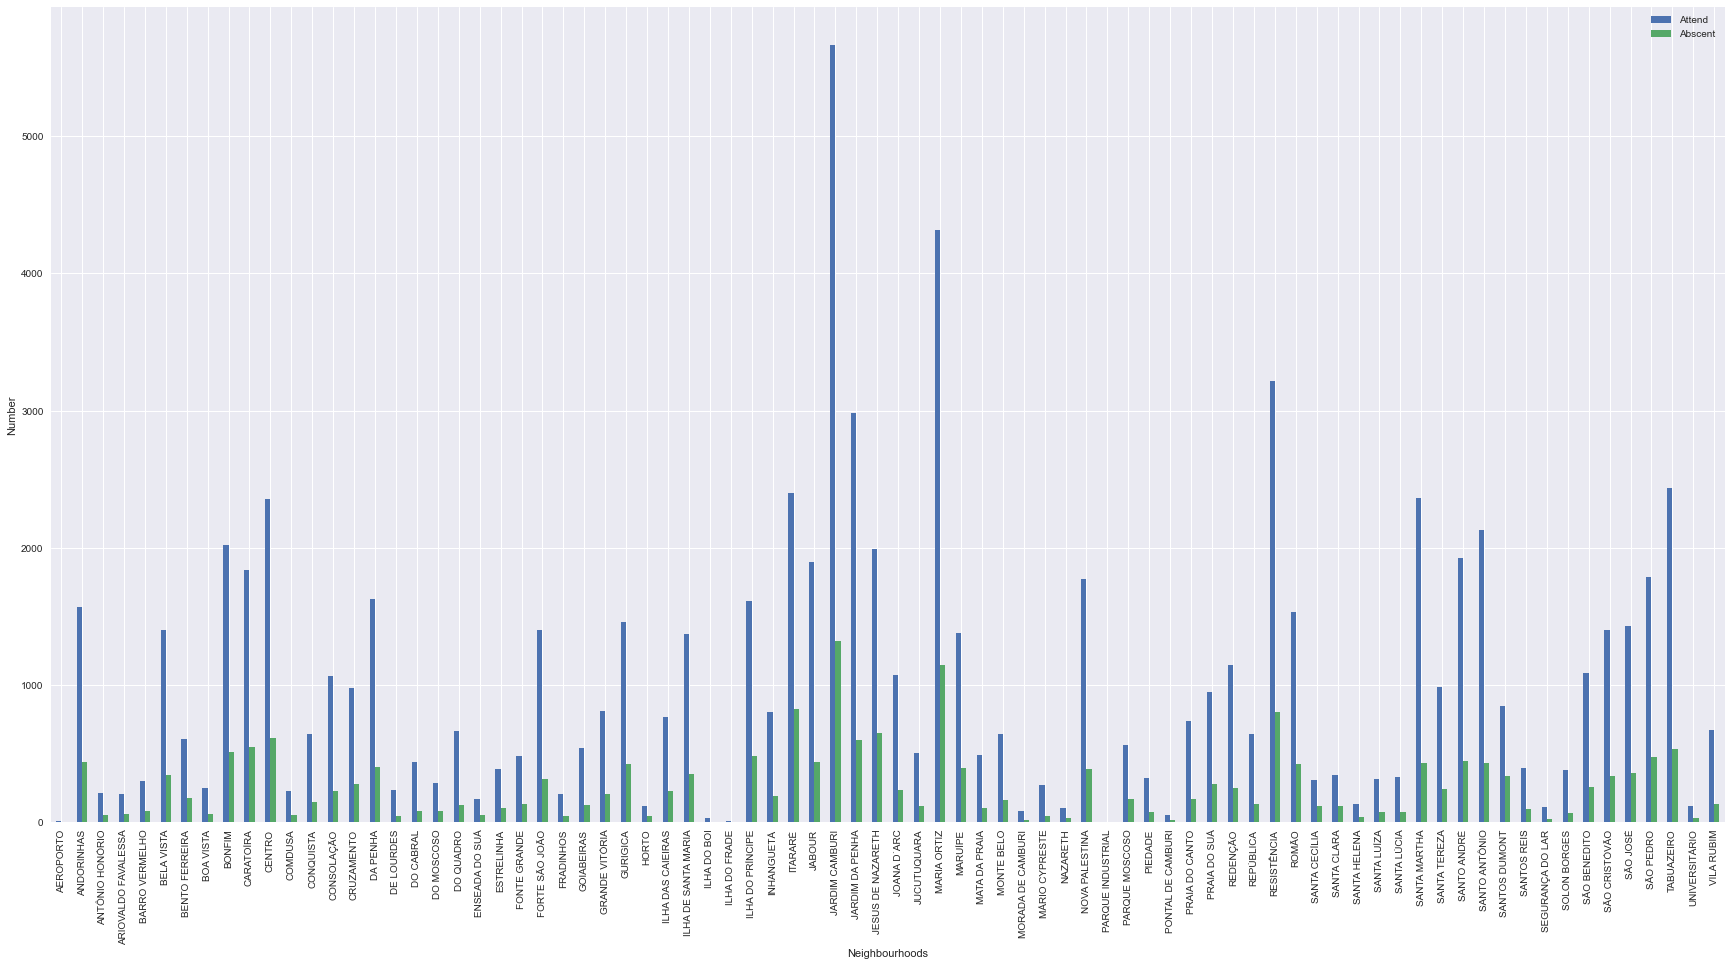

In [68]:
df_neighbourhood_show = df.query('no_show == "No"')[['neighbourhood','patient_id']].groupby('neighbourhood').count()

df_neighbourhood_no_show = df.query('no_show == "Yes"')[['neighbourhood','patient_id']].groupby('neighbourhood').count()

df_neighbourhood_merge = pd.merge(df_neighbourhood_show,df_neighbourhood_no_show,how='left',on='neighbourhood',suffixes=['_Attend','_Abscent'])


df_neighbourhood_merge.columns =['Attend','Abscent']

#Filling Abscent  NaN Neighbourhood
df_neighbourhood_merge = df_neighbourhood_merge.fillna(0)

df_neighbourhood_merge['Attend']=df_neighbourhood_merge['Attend'].astype(int)
df_neighbourhood_merge['Abscent']=df_neighbourhood_merge['Abscent'].astype(int)


df_neighbourhood_merge.plot.bar(xlabel='Neighbourhoods',ylabel='Number',figsize=(30,15))

- it is clear that neighbourhoods has higher attendence than abscence which means that there is no problem regarding neighbourhoods

### Research Question 7  (Does Difference between schedule day and appointments day have an effect ?)
>

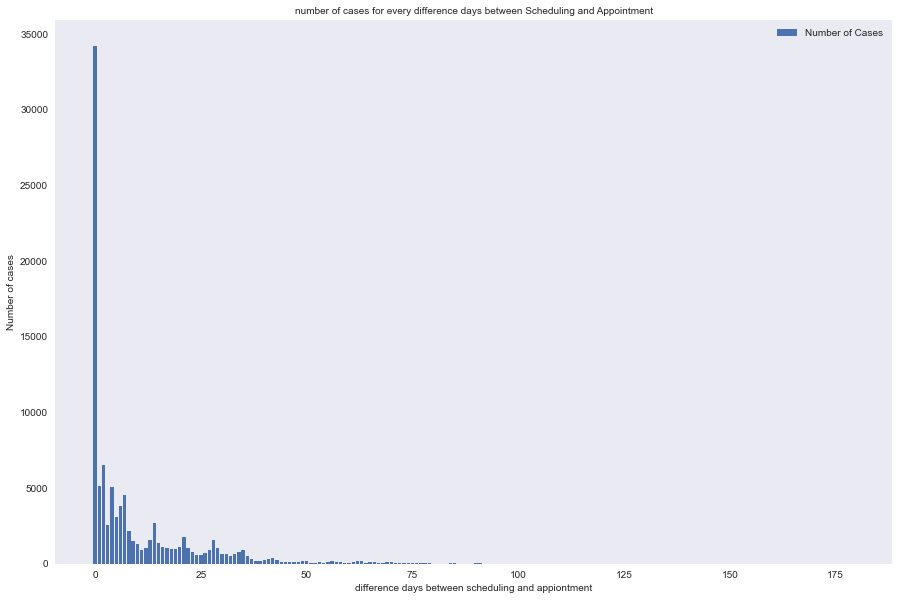

In [69]:
df_days_abscent = df.query('no_show == "Yes" ').groupby('days_difference').count().patient_id

df_total_days = df.groupby('days_difference').count().patient_id

days_difference_ratio = df_days_abscent/df_total_days


fig , ax = plt.subplots()
ax.bar(df_total_days.index,df_total_days.values,label="Number of Cases")
ax.grid()
ax.set_ylabel('Number of cases',size=10)
ax.set_title('number of cases for every difference days between Scheduling and Appointment',size=10)
ax.set_xlabel('difference days between scheduling and appiontment',size=10)
ax.legend()
fig.set_figheight(10)
fig.set_figwidth(15)



- people tend to schedule and attend at the same day rather than waiting a few days later

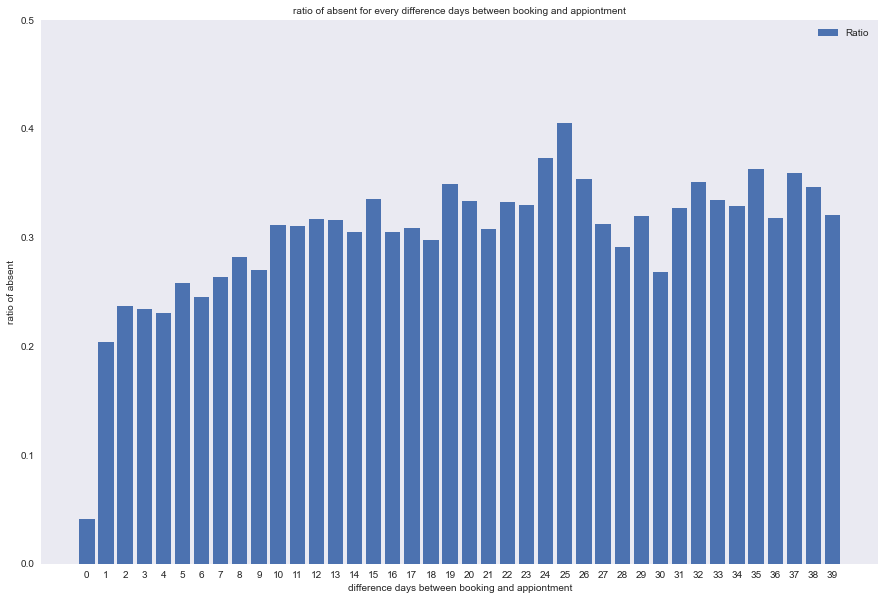

In [70]:
fig_ratio ,ax_ratio = plt.subplots()

ax_ratio.bar(days_difference_ratio.index[0:40],days_difference_ratio.values[0:40],label="Ratio")
ax_ratio.set_xticks(days_difference_ratio.index[0:40])
ax_ratio.set_xticklabels(days_difference_ratio.index[0:40])
ax_ratio.set_ylim(0,0.5)
ax_ratio.set_ylabel('ratio of absent',size=10)
ax_ratio.set_title('ratio of absent for every difference days between booking and appiontment',size=10)
ax_ratio.set_xlabel('difference days between booking and appiontment',size=10)
ax_ratio.legend()
ax_ratio.grid()
fig_ratio.set_figheight(10)
fig_ratio.set_figwidth(15)




- hmmm strange, the longer the days, an increase of no show ratio occurs

In [71]:
for index in days_difference_ratio.index:
    print('{} Days Difference Ratio: {} & Number of Cases Were: {}\n'.format(index,days_difference_ratio[index],df_total_days.values[index]))
    if index == 50:
        break



0 Days Difference Ratio: 0.04139503610372146 & Number of Cases Were: 34207

1 Days Difference Ratio: 0.20413335932930396 & Number of Cases Were: 5129

2 Days Difference Ratio: 0.23709280885064535 & Number of Cases Were: 6508

3 Days Difference Ratio: 0.23453908984830804 & Number of Cases Were: 2571

4 Days Difference Ratio: 0.23028266455821308 & Number of Cases Were: 5059

5 Days Difference Ratio: 0.25872093023255816 & Number of Cases Were: 3096

6 Days Difference Ratio: 0.24567836563645887 & Number of Cases Were: 3818

7 Days Difference Ratio: 0.26373626373626374 & Number of Cases Were: 4550

8 Days Difference Ratio: 0.2818352059925094 & Number of Cases Were: 2136

9 Days Difference Ratio: 0.2701639344262295 & Number of Cases Were: 1525

10 Days Difference Ratio: 0.3120184899845917 & Number of Cases Were: 1298

11 Days Difference Ratio: 0.3111353711790393 & Number of Cases Were: 916

12 Days Difference Ratio: 0.3168604651162791 & Number of Cases Were: 1032

13 Days Difference Ratio: 0

**As we can see from the difference in days ratio and graph, this is the most satisfying reason for why there is no show in appointments.**




<a id='conclusions'></a>
## Conclusions

This analysis containt 101803 sample with 20383 no show case with a ratio of 20%. which is considered a high ratio.
after analysing alot of factors, the most satysfying reason was the difference between scheduling days and the actual appointment day.
the ratio of 0 days difference was 0.04 for 34027 patient which is big number. the ratio keeps increasing when the differnce between days goes forward.

- diseases has no effect on no-show ratio. the ratio of the diseases are less than 20% of thw whole population
- a bigger sample would be enough to making a point around the problem itself

**There are Limitation in this analysis conducted as follows:**
- Are patient with age 0 a new born or not? if yes it indicates that there is high pregnency rate and the sick ratio of new born is high and need an attention to avoid death and symptoms duplication.
- There were no rating available for the hospital which could help in going deeper in analysis and finding if the hospital in a certain neighbourhood has a problem or not
- scholarships should have more details to find if the schoalrship itself ha a certain problem or not.
- need more data to analyse the relation between no-show and days differnce and where the problem arise from


